In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io as sio   #For loading MATLAB .mat file

In [2]:
#Function declaration 
def locateExtrema(CT, e):
    #Locate local extrema point 
    #Input --> A [3D np array]: A CT-image, e [positive integer] --> subcube size of (2e + 1)
    #Output --> localMaximaList, localMinimaList
    #           A [N-by-4 numpy] Each row represents the location and value of local maxima (or minima).
    #                            The first, second, and third value in each row are the location of the point with respect to 
    #                            the first, second, and third axis coordinate. 
    #Also output padCT if needed 
    #Note: This is a O(N^3) algorithm. Could be further improve with dynamic programming 
    
    e = int(e)    #Make sure that e is an integer
    
    #pad the cube with Nan
    padCT = np.full((CT.shape[0]+2*e, CT.shape[1]+2*e, CT.shape[2]+2*e), np.nan)
    padCT[e:CT.shape[0]+e, e:CT.shape[1]+e, e:CT.shape[2]+e] = CT
    
    localMaximaList = []
    localMinimaList = []
    
    #Loop through the CT-cube
    for i in range(e, CT.shape[0]+e):
        for j in range(e, CT.shape[1]+e):
            for k in range(e, CT.shape[2]+e):
                #Grab the center value
                center = padCT[i, j, k]
                
                #Grab a small subcube area
                subCube = padCT[i-e:i+e, j-e:j+e, k-e:k+e]
                
                #comparison
                if center == np.nanmax(subCube.flatten()):
                    localMaximaList.append([i, j, k, padCT[i, j, k]])
                elif center == np.nanmin(subCube.flatten()):
                    localMinimaList.append([i, j, k, padCT[i, j, k]])
                    
    localMaximaList = np.array(localMaximaList)
    localMinimaList = np.array(localMinimaList)    
    
    return localMaximaList, localMinimaList, padCT

# Test the algorithm with a random image 

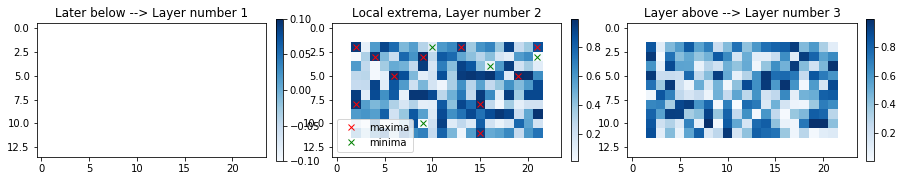

In [3]:
CT = np.random.rand(10, 20, 30)
epsilon = [2]

for e in epsilon:
    localMaximaList, localMinimaList, padCT = locateExtrema(CT, e)

##### Plotting #####
#Display output
layerNumber = 2
plt.figure(figsize = (15, 8))
plt.subplot(1, 3, 1)
im = plt.imshow(padCT[:, :, layerNumber-1], cmap = 'Blues')
plt.title('Later below --> Layer number {}'.format(layerNumber-1))
plt.colorbar(im, fraction=0.029, pad=0.04)

plt.subplot(1, 3, 2)
im = plt.imshow(padCT[:, :, layerNumber], cmap = 'Blues')
plt.plot(localMaximaList[localMaximaList[:, 2] == layerNumber, 1], localMaximaList[localMaximaList[:, 2] == layerNumber, 0], 'rx')
plt.plot(localMinimaList[localMinimaList[:, 2] == layerNumber, 1], localMinimaList[localMinimaList[:, 2] == layerNumber, 0], 'gx')
plt.title('Local extrema, Layer number {}'.format(layerNumber))
plt.legend(['maxima', 'minima'])
plt.colorbar(im, fraction=0.029, pad=0.04)

plt.subplot(1, 3, 3)
im = plt.imshow(padCT[:, :, layerNumber+1], cmap = 'Blues')
plt.title('Layer above --> Layer number {}'.format(layerNumber+1))
plt.colorbar(im, fraction=0.029, pad=0.04)
plt.show()

Figure 1: A result from the local extrema marking algorithm. The middle figure shows a slice with marked local extrema value. The red markers and the green markers illustrate the location of the local maxima point and local minima point, respectively. The left and the right figure show the layer located below and above the middle layer, respectively.   

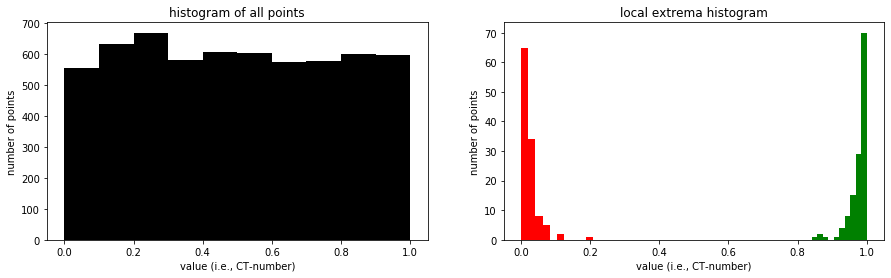

In [4]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.hist(CT.flatten(), bins = 10, color = 'k')
plt.xlabel('value (i.e., CT-number)')
plt.ylabel('number of points')
plt.title('histogram of all points')

plt.subplot(1, 2, 2)
plt.hist(localMinimaList[:, 3], bins = 10, color = 'r')
plt.hist(localMaximaList[:, 3], bins = 10, color = 'g') 
plt.xlabel('value (i.e., CT-number)')
plt.ylabel('number of points')
plt.title('local extrema histogram')

plt.show()

Figure 2: Histogram of all values (i.e., CT-number) and local extrema histogram

# Test with the UT02 sample

Here, we provide a subsample of the UT02 sample. We will show how the local extrema histogram change with epsilon, and, eventually, change the CT-number of pseudotargets. 

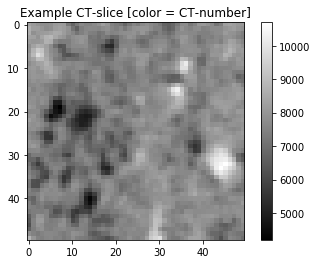

In [7]:
#Load data --> Load .mat file
data = sio.loadmat('subSample_UT02.mat')
CT = data['UT02']

plt.figure()
plt.imshow(CT[:, :, 5], cmap = 'gray')
plt.colorbar()
plt.title('Example CT-slice [color = CT-number]')
plt.show()

Figure 3: An example CT-slice from the UT02 sample. Note that this subsample size is 50x50x50 voxels and is randomly selected from the full sample. 

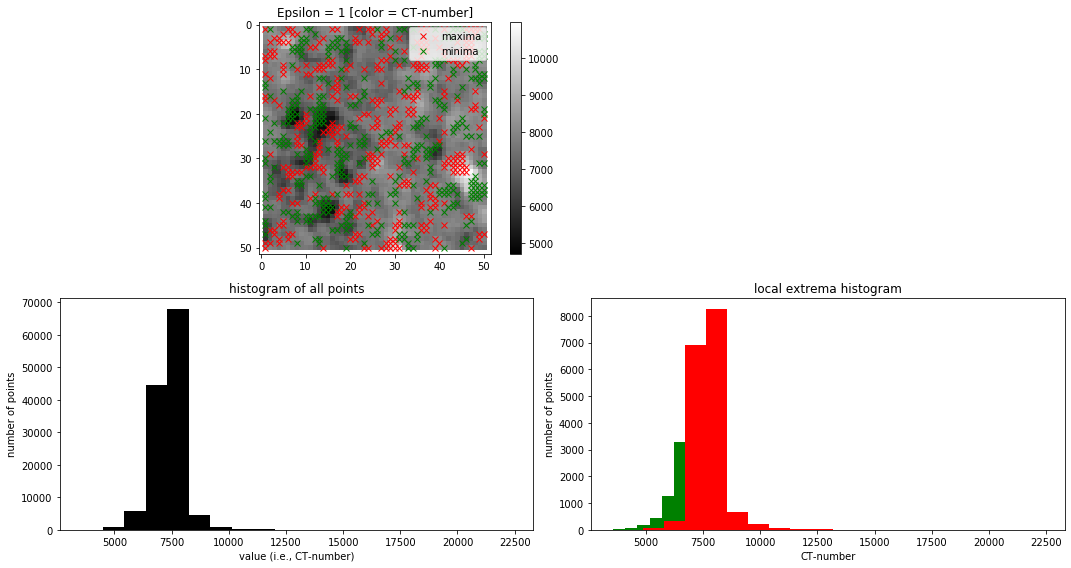

----------------------------------------------------------


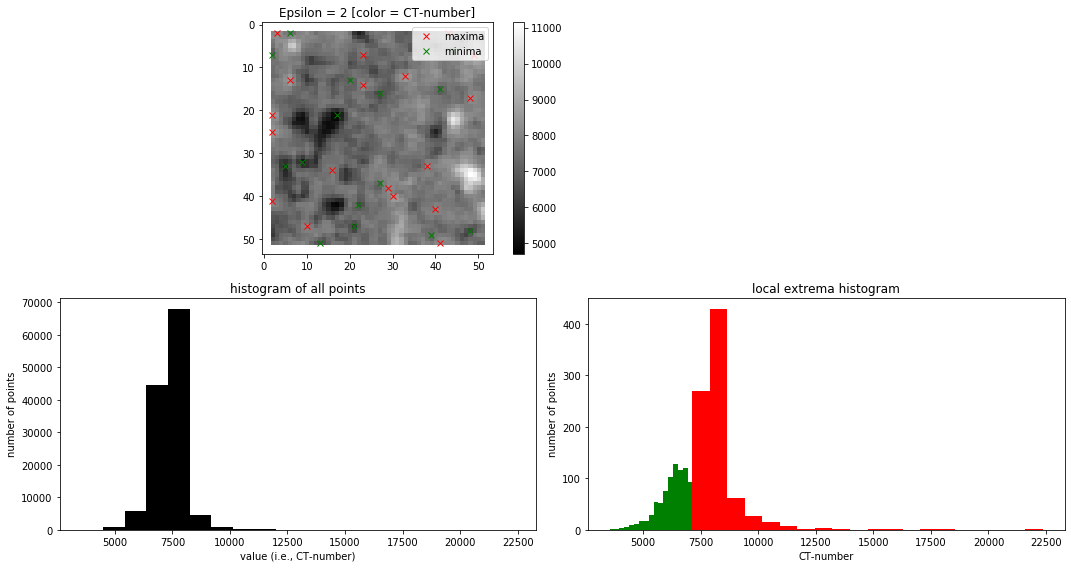

----------------------------------------------------------


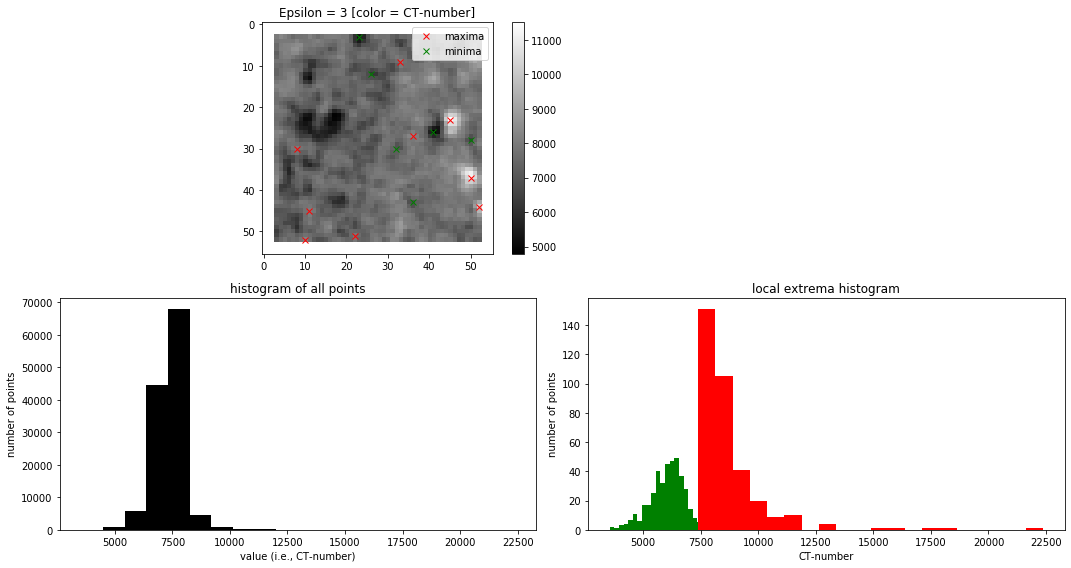

----------------------------------------------------------


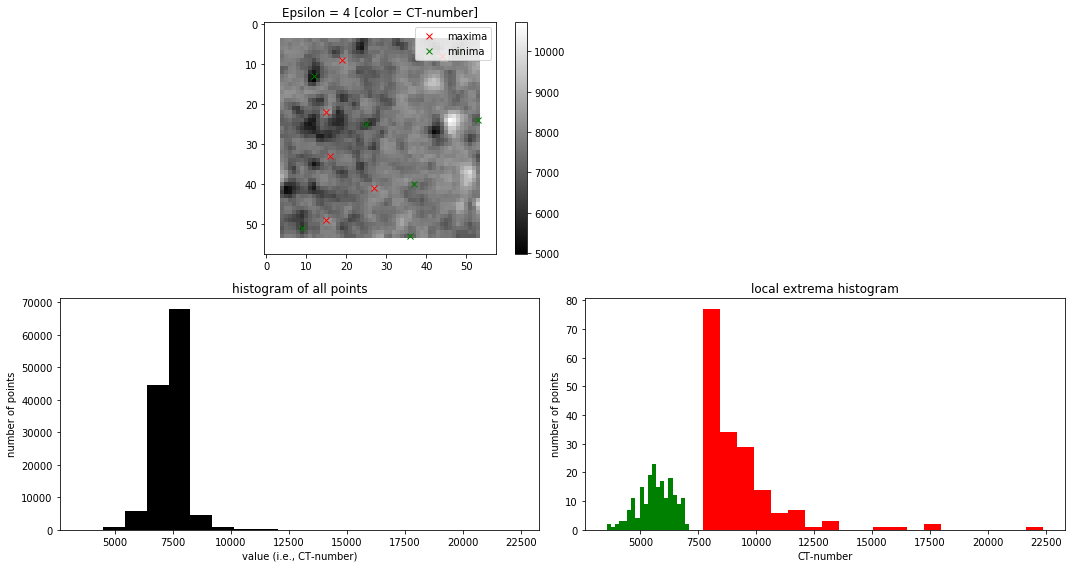

----------------------------------------------------------


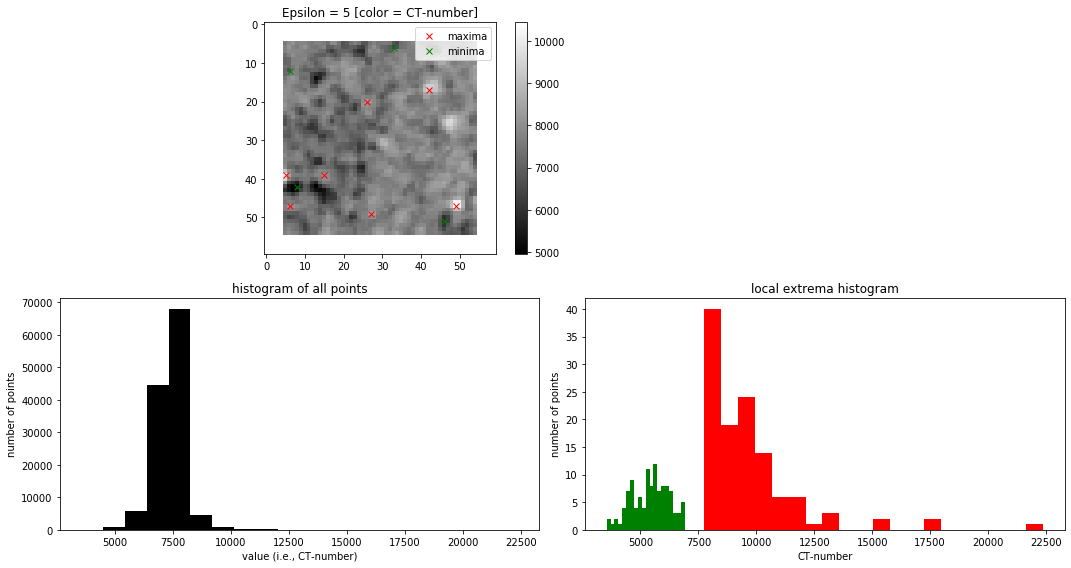

----------------------------------------------------------


In [9]:
epsilon = [1, 2, 3, 4, 5]
layerNumber = 5 
for e in epsilon:
    localMaximaList, localMinimaList, padCT = locateExtrema(CT, e)
    
    #Plotting 
    plt.figure(figsize = (15, 8))
    plt.subplot(2, 2, 1)
    im = plt.imshow(padCT[:, :, layerNumber], cmap = 'gray')
    plt.plot(localMaximaList[localMaximaList[:, 2] == layerNumber, 1], localMaximaList[localMaximaList[:, 2] == layerNumber, 0], 'rx')
    plt.plot(localMinimaList[localMinimaList[:, 2] == layerNumber, 1], localMinimaList[localMinimaList[:, 2] == layerNumber, 0], 'gx')
    plt.title('Epsilon = {} [color = CT-number]'.format(e))
    plt.legend(['maxima', 'minima'], loc = 'upper right')
    plt.colorbar(im, fraction=0.05, pad=0.04)
    
    plt.subplot(2, 2, 3)
    plt.hist(CT.flatten(), bins = 20, color = 'k')
    plt.xlabel('value (i.e., CT-number)')
    plt.ylabel('number of points')
    plt.title('histogram of all points')

    plt.subplot(2, 2, 4)
    plt.hist(localMinimaList[:, 3], bins = 20, color = 'g')
    plt.hist(localMaximaList[:, 3], bins = 20, color = 'r') 
    plt.xlabel('CT-number')
    plt.ylabel('number of points')
    plt.title('local extrema histogram')
    
    plt.tight_layout()
    plt.show()
    
    print('----------------------------------------------------------')

Figure: Local extrema histograms vs epsilon from epsilon = 1 - 5. 